In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

X = np.loadtxt("starting_kit/data/protein_train.data")
X_test = np.loadtxt("starting_kit/data/protein_test.data")
X_valid = np.loadtxt("starting_kit/data/protein_valid.data")

full_data = np.concatenate((X, X_test, X_valid))

In [57]:
#Normalisation de la matrice
row_sums = X.sum(axis=1)
normalized_data = X / row_sums[:, np.newaxis]

#SVD computation and plotting the eigenvalues
U, S, V = np.linalg.svd(normalized_data, full_matrices=False)

print("Number of singular values: {}".format(len(S)))
print("Max, min singular values: {}, {}".format(S[0], S[-1]))

plt.xlabel('$i$')
plt.ylabel('$\sigma_i$')
plt.title('Singular values')
plt.yscale('log')
plt.plot(S, 'bo');

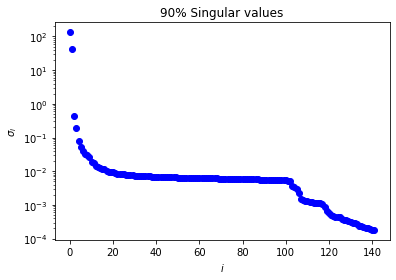

In [49]:
plt.xlabel('$i$')
plt.ylabel('$\sigma_i$')
plt.title('15% Singular values')
plt.yscale('log')
plt.plot(S[:int(0.15*len(S))], 'bo')

50568336
